# Машинное обучение, ФКН ВШЭ

# Семинар 3

В данном семинаре мы обсудим: 
* Библиотеку для численных вычислений Numpy
* Оптимальные константы и веса для функций потерь
* Градиентный спуск &mdash; преимущества и некоторые модификации

## NumPy

**NumPy** — библиотека языка Python, позволяющая [удобно] работать с многомерными массивами и матрицами, содержащая математические функции. Кроме того, NumPy позволяет векторизовать многие вычисления, имеющие место в машинном обучении.

 - [numpy](http://www.numpy.org)
 - [numpy tutorial](http://cs231n.github.io/python-numpy-tutorial/)
 - [100 numpy exercises](http://www.labri.fr/perso/nrougier/teaching/numpy.100/)

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Основным типом данных NumPy является многомерный массив элементов одного типа — [numpy.ndarray](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.array.html). Каждый подобный массив имеет несколько *измерений* или *осей* — в частности, вектор (в классическом понимании) является одномерным массивом и имеет 1 ось, матрица является двумерным массивом и имеет 2 оси и т.д.

In [2]:
vec = np.array([1, 2, 3])
vec.ndim # количество осей

1

In [3]:
mat = np.array([[1, 2, 3], [4, 5, 6]])
mat.ndim

2

Чтобы узнать длину массива по каждой из осей, можно воспользоваться атрибутом shape:

In [4]:
vec.shape

(3,)

Чтобы узнать тип элементов и их размер в байтах:

In [5]:
mat.dtype.name

'int64'

In [6]:
mat.itemsize

8

#### Создание массивов

* Передать итерируемый объект в качестве параметра функции array (можно также явно указать тип элементов):

In [7]:
A = np.array([1, 2, 3])
A, A.dtype

(array([1, 2, 3]), dtype('int64'))

In [8]:
A = np.array([1, 2, 3], dtype=float)
A, A.dtype

(array([1., 2., 3.]), dtype('float64'))

* Создание массивов специального вида при помощи функций zeros, ones, empty, identity:

In [9]:
np.zeros((3,))

array([0., 0., 0.])

In [10]:
np.ones((3, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [11]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

* Создание последовательностей при помощи функций arange (в качестве параметров принимает левую и правую границы последовательности и **шаг**) и linspace (принимает левую и правую границы и **количество элементов**):

In [12]:
np.arange(2, 20, 3) # аналогично стандартной функции range python, правая граница не включается

array([ 2,  5,  8, 11, 14, 17])

In [13]:
np.arange(2.5, 8.7, 0.9) # но может работать и с вещественными числами

array([2.5, 3.4, 4.3, 5.2, 6.1, 7. , 7.9])

In [14]:
np.linspace(2, 18, 14) # правая граница включается (по умолчанию)

array([ 2.        ,  3.23076923,  4.46153846,  5.69230769,  6.92307692,
        8.15384615,  9.38461538, 10.61538462, 11.84615385, 13.07692308,
       14.30769231, 15.53846154, 16.76923077, 18.        ])

* Для изменения размеров существующего массива можно воспользоваться функцией reshape (при этом количество элементов должно оставаться неизменным):

In [15]:
np.arange(9).reshape(3, 3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Вместо значения длины массива по одному из измерений можно указать -1 — в этом случае значение будет рассчитано автоматически:

In [16]:
np.arange(8).reshape(2, -1)

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

* Транспонирование существующего массива:

In [17]:
C = np.arange(6).reshape(2, -1)
C

array([[0, 1, 2],
       [3, 4, 5]])

In [18]:
C.T

array([[0, 3],
       [1, 4],
       [2, 5]])

* Повторение существующего массива

In [19]:
a = np.arange(3)
np.tile(a, (2, 2))

array([[0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2]])

In [20]:
np.tile(a, (4, 1))

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

#### Базовые операции

* Базовые арифметические операции над массивами выполняются поэлементно:

In [21]:
A = np.arange(9).reshape(3, 3)
B = np.arange(1, 10).reshape(3, 3)

In [22]:
print(A)
print(B)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [23]:
A + B

array([[ 1,  3,  5],
       [ 7,  9, 11],
       [13, 15, 17]])

In [24]:
A * 1.0 / B

array([[0.        , 0.5       , 0.66666667],
       [0.75      , 0.8       , 0.83333333],
       [0.85714286, 0.875     , 0.88888889]])

In [25]:
A + 1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [26]:
3 * A

array([[ 0,  3,  6],
       [ 9, 12, 15],
       [18, 21, 24]])

In [27]:
A ** 2

array([[ 0,  1,  4],
       [ 9, 16, 25],
       [36, 49, 64]])

Отдельно обратим внимание на то, что умножение массивов также является **поэлементным**, а не матричным:

In [28]:
A * B

array([[ 0,  2,  6],
       [12, 20, 30],
       [42, 56, 72]])

Для выполнения матричного умножения необходимо использовать функцию dot:

In [29]:
A.dot(B)

array([[ 18,  21,  24],
       [ 54,  66,  78],
       [ 90, 111, 132]])

Поскольку операции выполняются поэлементно, операнды бинарных операций должны иметь одинаковый размер. Тем не менее, операция может быть корректно выполнена, если размеры операндов таковы, что они могут быть расширены до одинаковых размеров. Данная возможность называется [broadcasting](http://www.scipy-lectures.org/intro/numpy/operations.html#broadcasting):
![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png)

In [30]:
np.tile(np.arange(0, 40, 10), (3, 1)).T + np.array([0, 1, 2])

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

* Некоторые операции над массивами (например, вычисления минимума, максимума, суммы элементов) выполняются над всеми элементами вне зависимости от формы массива, однако при указании оси выполняются вдоль нее (например, для нахождения максимума каждой строки или каждого столбца):

In [31]:
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [32]:
A.min()

0

In [33]:
A.max(axis=1)

array([2, 5, 8])

In [34]:
A.sum(axis=1)

array([ 3, 12, 21])

#### Индексация

Для доступа к элементам может использоваться [много различных способов](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html), рассмотрим основные.

* Для индексации могут использоваться конкретные значения индексов и срезы (slice), как и в стандартных типах Python. Для многомерных массивов индексы для различных осей разделяются запятой. Если для многомерного массива указаны индексы не для всех измерений, недостающие заполняются полным срезом (:).

In [35]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
a[2:5]

array([2, 3, 4])

In [37]:
a[3:8:2]

array([3, 5, 7])

In [38]:
A = np.arange(81).reshape(9, -1)
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

In [39]:
A[2:4]

array([[18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35]])

In [40]:
A[:, 2:4]

array([[ 2,  3],
       [11, 12],
       [20, 21],
       [29, 30],
       [38, 39],
       [47, 48],
       [56, 57],
       [65, 66],
       [74, 75]])

In [41]:
A[2:4, 2:4]

array([[20, 21],
       [29, 30]])

In [42]:
A[-1]

array([72, 73, 74, 75, 76, 77, 78, 79, 80])

In [43]:
A[:, -1]

array([ 8, 17, 26, 35, 44, 53, 62, 71, 80])

* Также может использоваться индексация при помощи списков индексов (по каждой из осей):

In [44]:
A = np.arange(81).reshape(9, -1)
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

In [45]:
A[[2, 4, 5], [0, 1, 3]]

array([18, 37, 48])

* Может также применяться логическая индексация (при помощи логических массивов):

In [46]:
A = np.arange(11)
A

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [47]:
A[A % 5 != 3]

array([ 0,  1,  2,  4,  5,  6,  7,  9, 10])

In [48]:
A[np.logical_and(A != 7, A % 5 != 3)] # также можно использовать логические операции

array([ 0,  1,  2,  4,  5,  6,  9, 10])

In [49]:
A[(A != 7) & (A % 5 != 3)]

array([ 0,  1,  2,  4,  5,  6,  9, 10])

#### Зачем?

Зачем необходимо использовать NumPy, если существуют стандартные списки/кортежи и циклы?

Причина заключается в скорости работы. Попробуем посчитать скалярное произведение 2 больших векторов:

In [50]:
SIZE = 10000000

A_quick_arr = np.random.normal(size = (SIZE,))
B_quick_arr = np.random.normal(size = (SIZE,))

A_slow_list, B_slow_list = list(A_quick_arr), list(B_quick_arr)

In [51]:
%%time
ans = 0
for i in range(len(A_slow_list)):
    ans += A_slow_list[i] * B_slow_list[i]

CPU times: user 3.29 s, sys: 4.91 ms, total: 3.3 s
Wall time: 3.3 s


In [52]:
%%time
ans = sum([A_slow_list[i] * B_slow_list[i] for i in range(SIZE)])

CPU times: user 2.58 s, sys: 172 ms, total: 2.75 s
Wall time: 2.76 s


In [53]:
%%time
ans = np.sum(A_quick_arr * B_quick_arr)

CPU times: user 34.8 ms, sys: 26.7 ms, total: 61.6 ms
Wall time: 61.6 ms


In [54]:
%%time
ans = A_quick_arr.dot(B_quick_arr)

CPU times: user 11.4 ms, sys: 742 µs, total: 12.1 ms
Wall time: 10 ms


## Градиентный спуск

Напомним, что в градиентном спуске значения параметров на следующем шаге получаются из значений параметров на текущем шаге смещением в сторону антиградиента функционала: 

$$w^{(t+1)} = w^{(t)} - \eta_t \nabla Q(w^{(t)}),$$
где $\eta_t$ — длина шага градиентного спуска.

### Асимптотическая сложность 

Явная формула параметров линейной модели записывается как $w = (X^TX)^{-1}X^Ty$, и в ней присутствует обращение матрицы $X^TX$ — очень трудоёмкая операция при большом количестве признаков. Нетрудно подсчитать, что сложность вычислений $O(d^3 + d^2l)$. При решении задач такая трудоёмкость часто оказывается непозволительной, поэтому параметры ищут итерационными методами, стоимость которых меньше. Один из них — градиентный спуск.

Формула градиента функции ошибки в случае MSE, как мы вывели ранее, выглядит следующим образом:

$$\nabla Q(w) = 2X^T(Xw - y).$$
 
Сложность вычислений в данном случае $O(dl)$. Стохастический градиентный спуск отличается от обычного заменой градиента на несмещённую оценку по одному или нескольким объектам. В этом случае сложность становится $O(kd)$, где $k$ — количество объектов, по которым оценивается градиент, $k << l$. Это отчасти объясняет популярность стохастических методов оптимизации.

### Визуализация траекторий GD и SGD
На простом примере разберём основные тонкости, связанные со стохастической оптимизацией.

Сгенерируем матрицу объекты—признаки $X$ и вектор весов $w_{true}$, вектор целевых переменных $y$ вычислим как $Xw_{true}$ и добавим нормальный шум:

In [55]:
n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  # for different scales
Y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_0 = np.random.uniform(-2, 2, (n_features))

Обучим на полученных данных линейную регрессию для MSE при помощи полного градиентного спуска — тем самым получим вектор параметров.

In [60]:
w = w_0.copy()
w_list = [w.copy()]
step_size = 1e-2

for i in range(num_steps):
    w -= 2 * step_size * np.dot(X.T, np.dot(X, w) - Y) / Y.shape[0]
    w_list.append(w.copy())
w_list = np.array(w_list)

Покажем последовательность оценок параметров $w^{(t)}$, получаемых в ходе итераций. Красная точка — $w_{true}$.

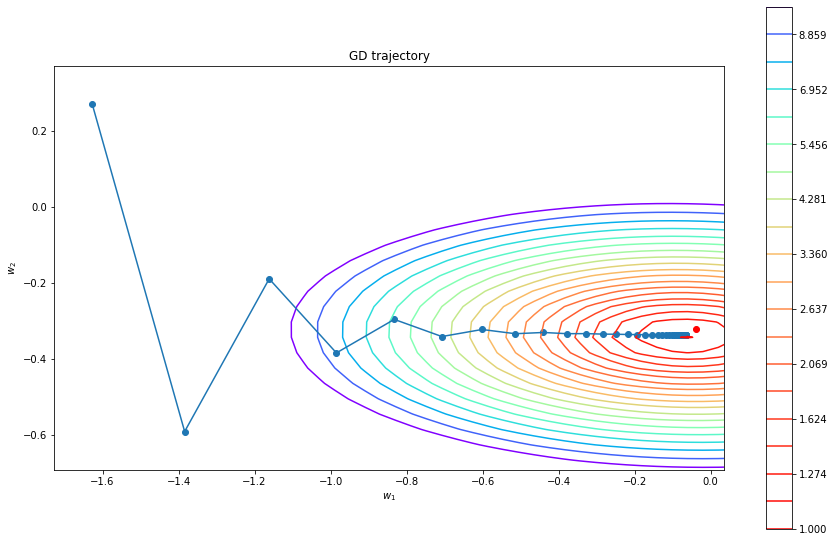

In [57]:
# compute level set
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))


plt.figure(figsize=(15, 12))
plt.title('GD trajectory')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1))
plt.ylim((w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1))
plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

# visualize trajectory
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

На лекции обсуждалось, что градиент перпендикулярен линиям уровня. Это объясняет такие зигзагообразные траектории градиентного спуска. Для большей наглядности в каждой точке пространства посчитаем градиент функционала и покажем его направление.

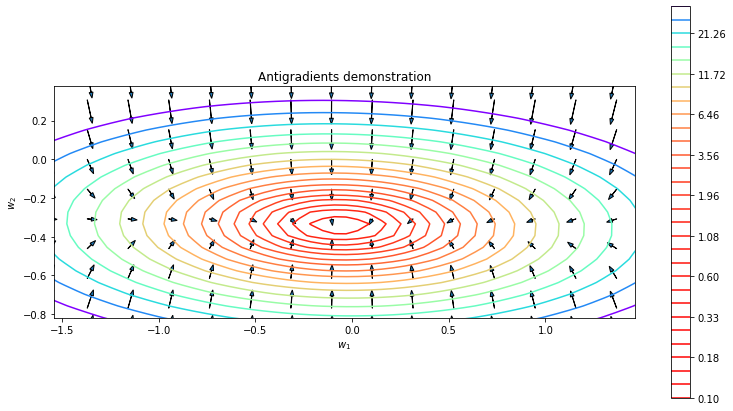

In [58]:
# compute level set
A, B = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
A_mini, B_mini = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 27))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))
        
# visualize the level set
plt.figure(figsize=(13, 9))
CS = plt.contour(A, B, levels, levels=np.logspace(-1, 1.5, num=30), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
        
# visualize the gradients
gradients = np.empty_like(A_mini)
for i in range(A_mini.shape[0]):
    for j in range(A_mini.shape[1]):
        w_tmp = np.array([A_mini[i, j], B_mini[i, j]])
        antigrad = - 2*1e-3 * np.dot(X.T, np.dot(X, w_tmp) - Y) / Y.shape[0]
        plt.arrow(A_mini[i, j], B_mini[i, j], antigrad[0], antigrad[1], head_width=0.02)

plt.title('Antigradients demonstration')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_true[0] - 1.5, w_true[0] + 1.5))
plt.ylim((w_true[1] - .5, w_true[1] + .7))
plt.gca().set_aspect('equal')
plt.show()

Визуализируем теперь траектории стохастического градиентного спуска, повторив те же самые действия, оценивая при этом градиент по подвыборке.

In [59]:
w = w_0.copy()
w_list = [w.copy()]
step_size = 0.2

for i in range(num_steps):
    sample = np.random.randint(n_objects, size=batch_size)
    w -= 2 * step_size * np.dot(X[sample].T, np.dot(X[sample], w) - Y[sample]) / batch_size
    w_list.append(w.copy())
w_list = np.array(w_list)

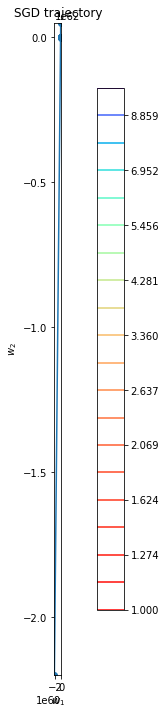

In [60]:
# compute level set
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))


plt.figure(figsize=(13, 12))
plt.title('SGD trajectory')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1))
plt.ylim((w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1))
plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

# visualize trajectory
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Как видно, метод стохастического градиента «бродит» вокруг оптимума. Это объясняется подбором шага градиентного спуска $\eta_k$. Дело в том, что для сходимости стохастического градиентного спуска для последовательности шагов $\eta_k$ должны выполняться [условия Роббинса-Монро](https://projecteuclid.org/download/pdf_1/euclid.aoms/1177729586):
$$
\sum_{k = 1}^\infty \eta_k = \infty, \qquad \sum_{k = 1}^\infty \eta_k^2 < \infty.
$$
Интуитивно это означает следующее: 
1. последовательность должна расходиться, чтобы метод оптимизации мог добраться до любой точки пространства, 
2. но расходиться не слишком быстро.

Попробуем посмотреть на траектории SGD, последовательность шагов которой удовлетворяет условиям Роббинса-Монро:

In [61]:
w = w_0.copy()
w_list = [w.copy()]
step_size_0 = 0.45

for i in range(num_steps):
    step_size = step_size_0 / ((i+1)**0.51)
    sample = np.random.randint(n_objects, size=batch_size)
    w -= 2 * step_size * np.dot(X[sample].T, np.dot(X[sample], w) - Y[sample]) / batch_size
    w_list.append(w.copy())
w_list = np.array(w_list)

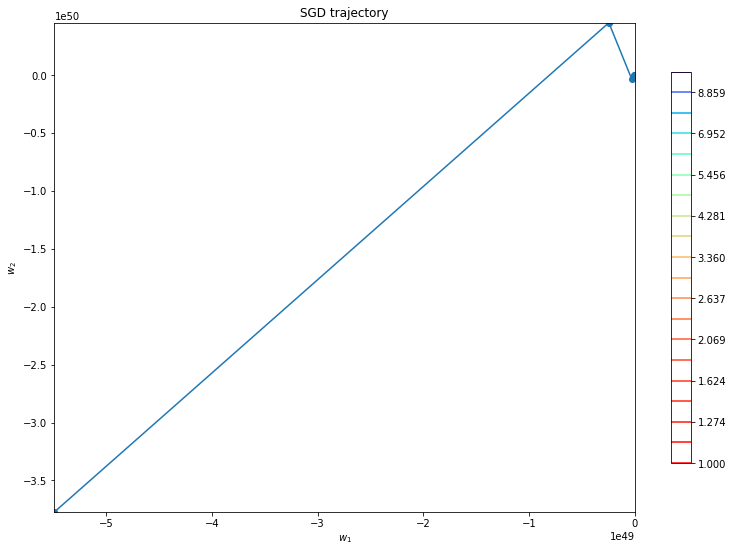

In [62]:
# compute level set
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))


plt.figure(figsize=(13, 9))
plt.title('SGD trajectory')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1))
plt.ylim((w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1))
#plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

# visualize trajectory
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

### Сравнение скоростей сходимости

Последнее, что хотелось бы продемонстрировать — сравнение, насколько быстро достигают оптимума метод полного и стохастического градиентного спуска. Сгенерируем выборку и построим график зависимости функционала от итерации.

In [63]:
# data generation
n_features = 50
n_objects = 1000
num_steps = 200
batch_size = 2

w_true = np.random.uniform(-2, 2, n_features)

X = np.random.uniform(-10, 10, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 5, n_objects)

In [64]:
from scipy.linalg import norm

step_size_sgd = 1
step_size_gd = 1e-2
w_sgd = np.random.uniform(-4, 4, n_features)
w_gd = w_sgd.copy()
residuals_sgd = [np.mean(np.power(np.dot(X, w_sgd) - Y, 2))]
residuals_gd = [np.mean(np.power(np.dot(X, w_gd) - Y, 2))]

norm_sgd = []
norm_gd = []


for i in range(num_steps):
    step_size = step_size_sgd / ((i+1) ** 0.51)
    sample = np.random.randint(n_objects, size=batch_size)
    
    w_sgd -= 2 * step_size * np.dot(X[sample].T, np.dot(X[sample], w_sgd) - Y[sample]) / batch_size
    residuals_sgd.append(np.mean(np.power(np.dot(X, w_sgd) - Y, 2)))
    norm_sgd.append(norm(np.dot(X[sample].T, np.dot(X[sample], w_sgd) - Y[sample])))
    
    w_gd -= 2 * step_size_gd * np.dot(X.T, np.dot(X, w_gd) - Y) / Y.shape[0]
    residuals_gd.append(np.mean(np.power(np.dot(X, w_gd) - Y, 2)))
    norm_gd.append(norm(np.dot(X.T, np.dot(X, w_gd) - Y)))

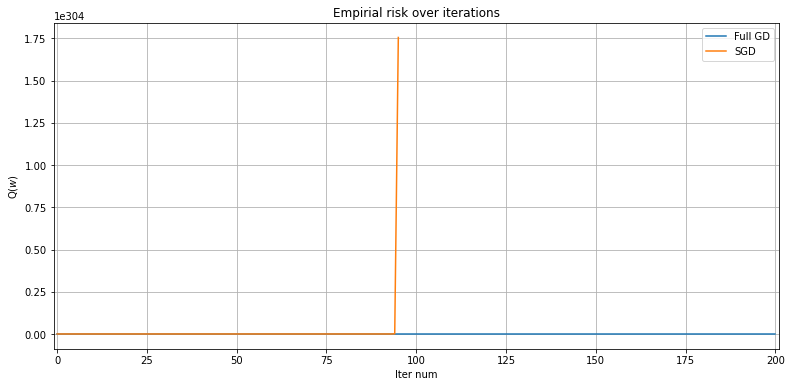

In [65]:
plt.figure(figsize=(13, 6))
plt.plot(range(num_steps+1), residuals_gd, label='Full GD')
plt.plot(range(num_steps+1), residuals_sgd, label='SGD')

plt.title('Empirial risk over iterations')
plt.xlim((-1, num_steps+1))
plt.legend()
plt.xlabel('Iter num')
plt.ylabel(r'Q($w$)')
plt.grid()
plt.show()

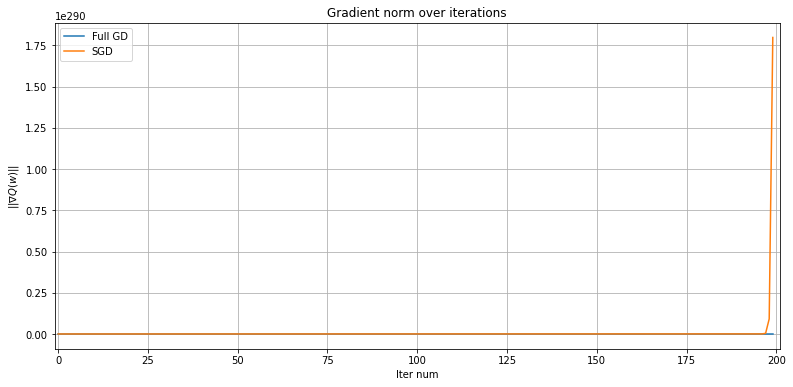

In [66]:
plt.figure(figsize=(13, 6))
plt.plot(range(num_steps), norm_gd, label='Full GD')
plt.plot(range(num_steps), norm_sgd, label='SGD')

plt.title('Gradient norm over iterations')
plt.xlim((-1, num_steps+1))
plt.legend()
plt.xlabel('Iter num')
plt.ylabel(r'$||\nabla Q$($w$)||')
plt.grid()
plt.show()

Как видно, GD буквально за несколько итераций оказывается вблизи оптимума, в то время как поведение SGD может быть весьма нестабильным. Как правило, для более сложных моделей наблюдаются ещё большие флуктуации в зависимости качества функционала от итерации при использовании стохастических градиентных методов. Путём подбора величины шага можно добиться лучшей скорости сходимости, и существуют методы, адаптивно подбирающие величину шага (AdaGrad, Adam, RMSProp).